In [18]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('df4.csv', index_col='customer_id')

In [12]:
df.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,...,cuisine_variety,last_promo,payment_method,age_group,customer_lifecycle_stage,peak_order_day,peak_order_hour,prf_kmeans_labels,beh_som_cluster,merged_labels
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.093442,0.0,...,1,DELIVERY,DIGI,0-20,New,DOW_0,HR_18,3,1,1
5d272b9dcb,0.045751,0.007126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,2,DISCOUNT,DIGI,0-20,New,DOW_0,HR_10,0,1,3
f6d1b2ba63,0.032833,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1,DISCOUNT,CASH,31-40,New,DOW_0,HR_9,1,1,0
180c632ed8,0.000000,0.015278,0.0,0.0,0.0,0.0,0.0,0.0,0.057786,0.0,...,2,DELIVERY,DIGI,21-30,New,DOW_1,HR_11,3,1,1
4eb37a6705,0.051997,0.045578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,2,NO PROMO,DIGI,0-20,New,DOW_1,HR_8,3,1,1


In [19]:
merged_perspectives = ['average_spending', 'customer_age', 'days_since_last_order',
       'first_order', 'order_frequency', 'total_amount_spent', 'total_orders',
       'vendor_loyalty_score', 'relative_cuisine_variety',
       'chain_consumption']

# Cluster Exploration

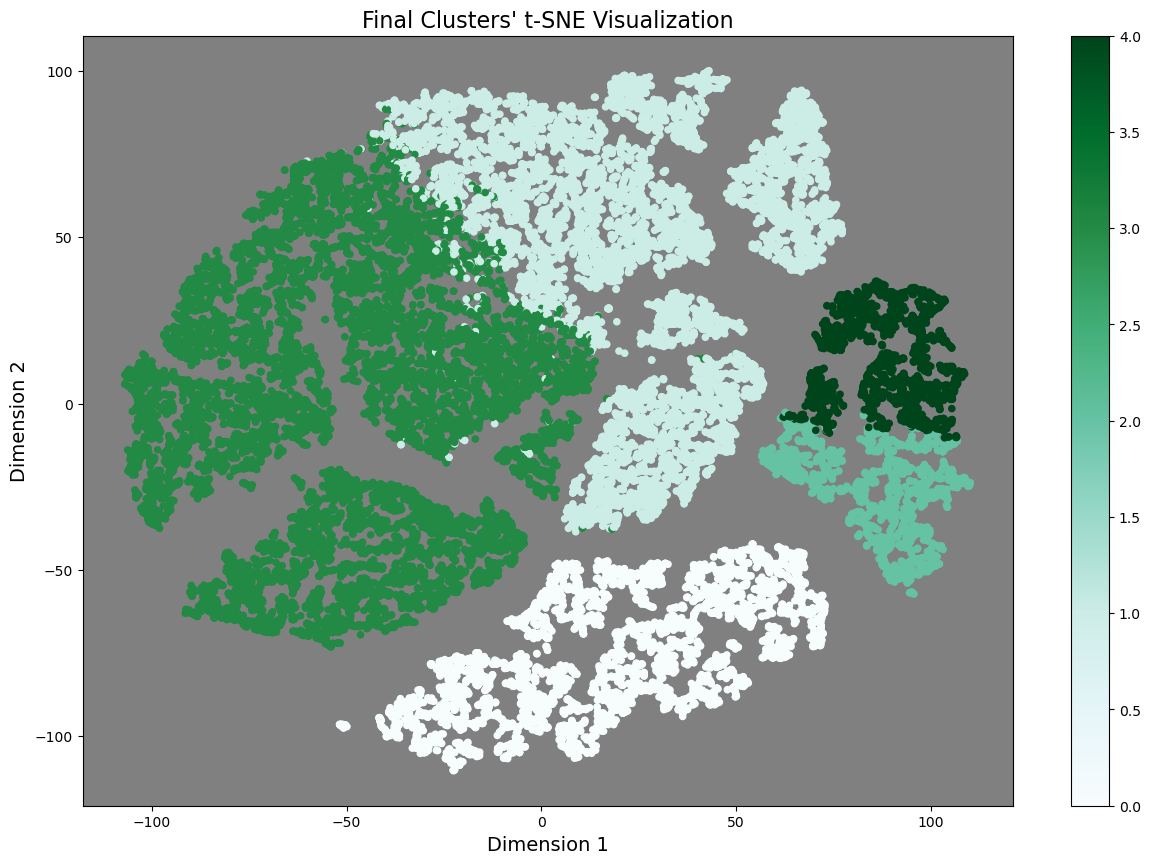

In [30]:
# t-sne visualization of the final clusters
two_dim = TSNE(random_state=42).fit_transform(df[merged_perspectives])

scatter_plot = pd.DataFrame(two_dim).plot.scatter(
    x=0, y=1, c=df['merged_labels'], 
    colormap='BuGn', 
    figsize=(15, 10))

scatter_plot.set_facecolor('grey')  # background color
scatter_plot.set_title("Final Clusters' t-SNE Visualization", fontsize=16)
scatter_plot.set_xlabel("Dimension 1", fontsize=14)
scatter_plot.set_ylabel("Dimension 2", fontsize=14)
plt.show()

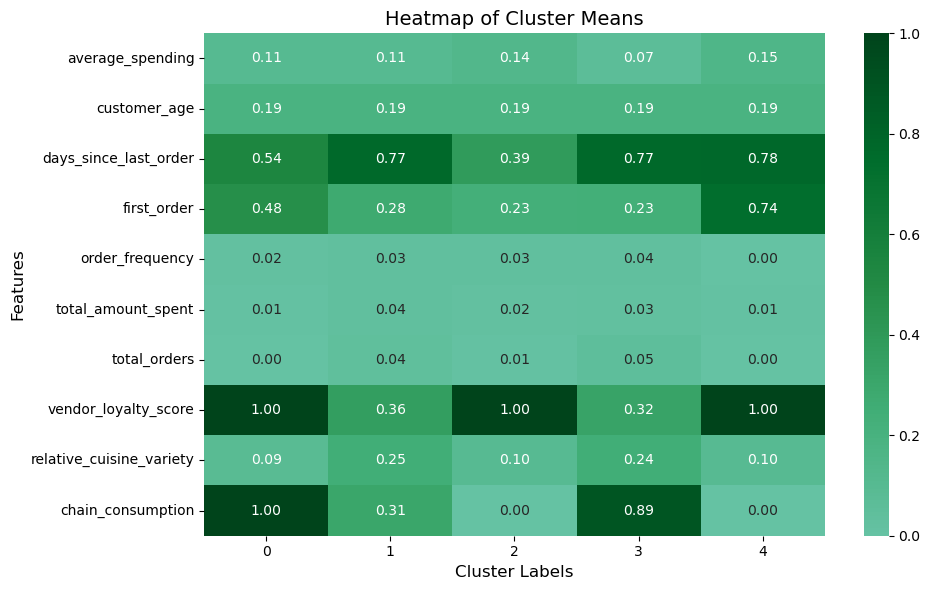

In [24]:
# Compute the mean of the features for each cluster
cluster_means = df[merged_perspectives + ['merged_labels']].groupby('merged_labels').mean()

# Transpose for the heatmap (features as rows, clusters as columns)
cluster_means_transposed = cluster_means.T

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(cluster_means_transposed,
            center=0, annot=True, cmap="BuGn", fmt=".2f")

# Add labels and title
plt.xlabel("Cluster Labels", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Heatmap of Cluster Means", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
# grouping by the sum of orders for each day of the week
orders_day_proportions = df[['merged_labels','DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].groupby(['merged_labels']).sum()

# calculate the total orders for each day 
orders_day_proportions['TotalOrders'] = orders_day_proportions.sum(axis=1)

# calculate the proportion of orders for each day
orders_day_proportions_ = orders_day_proportions.loc[:, 'DOW_0':'DOW_6'].div(orders_day_proportions['TotalOrders'], axis=0)

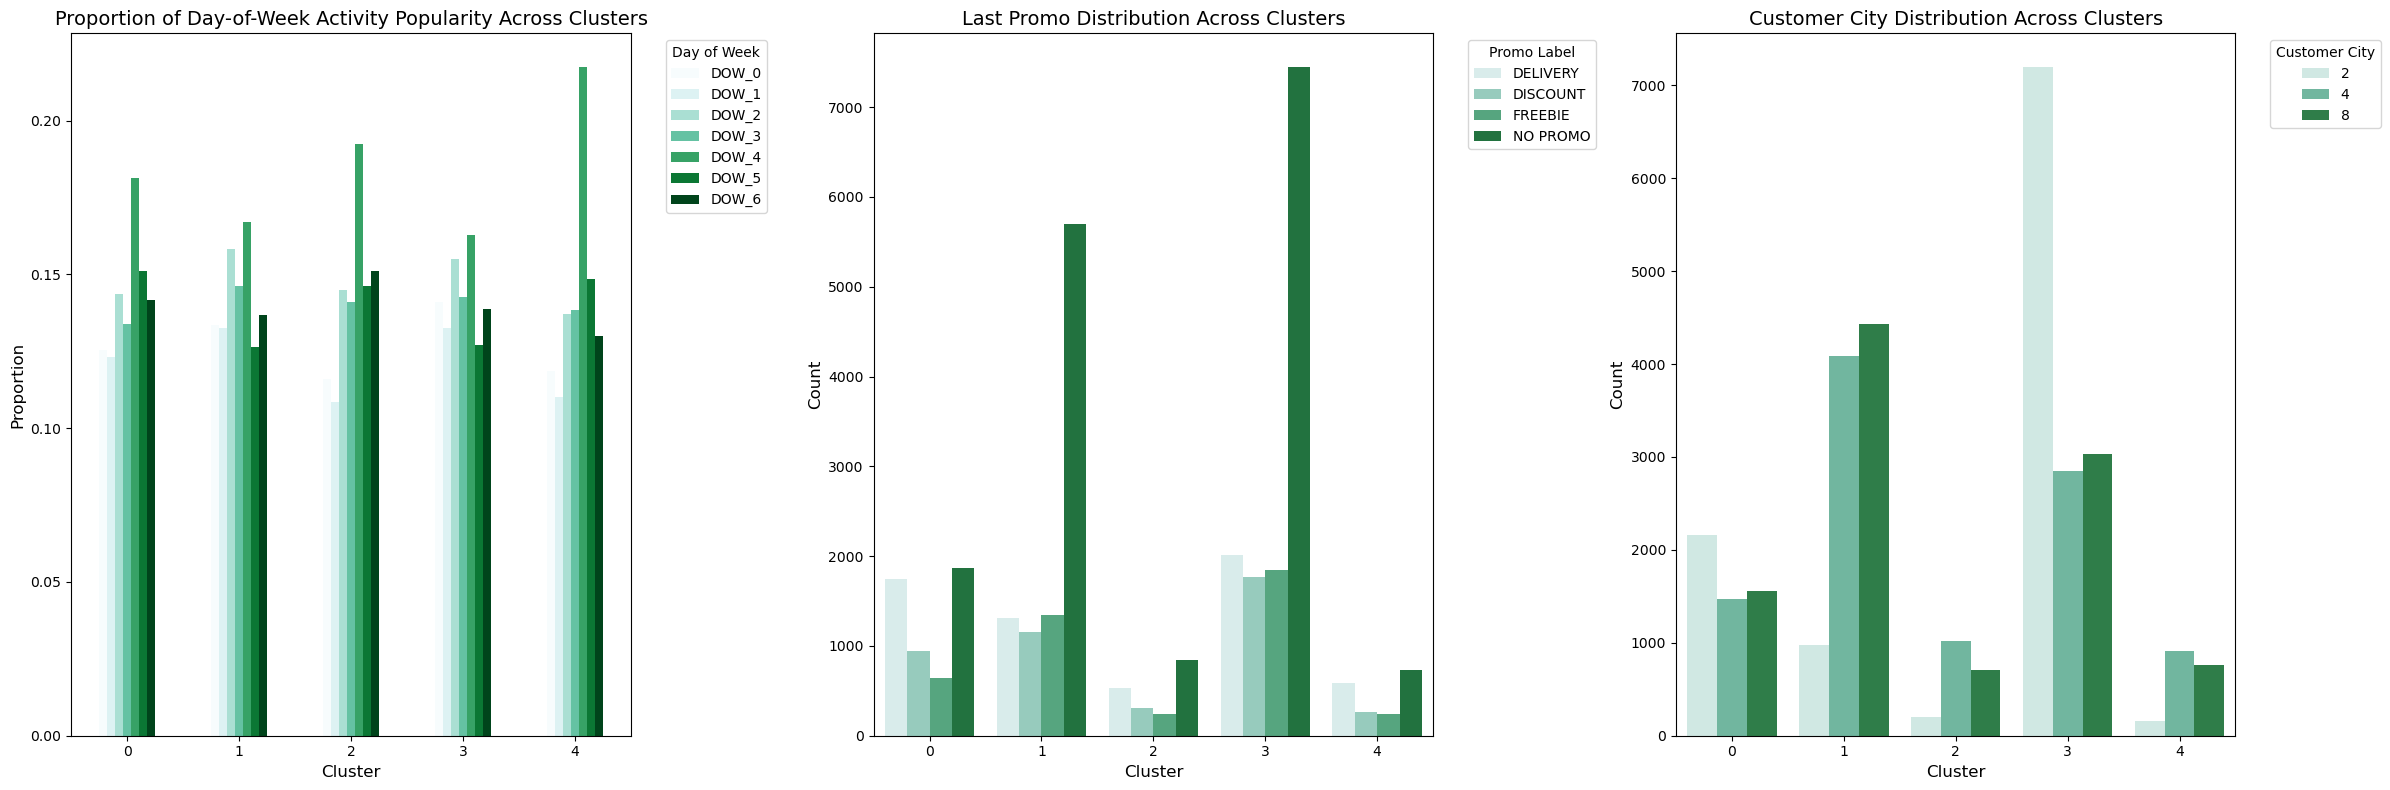

In [32]:
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))  # Adjust figure size as needed

# Plot 1: Proportion of Day-of-Week Activity Popularity Across Clusters
orders_day_proportions_.plot(
    kind='bar',
    stacked=False,
    colormap='BuGn', 
    ax=axes[0]
)
axes[0].set_title("Proportion of Day-of-Week Activity Popularity Across Clusters", fontsize=14)
axes[0].set_xlabel("Cluster", fontsize=12)
axes[0].set_ylabel("Proportion", fontsize=12)
axes[0].legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: Last Promo Distribution Across Clusters
last_promo_counts = df.groupby(['merged_labels', 'last_promo']).size().reset_index(name='count')
sns.barplot(
    data=last_promo_counts,
    x='merged_labels',
    y='count',
    hue='last_promo',
    ax=axes[1],
    palette='BuGn'
)
axes[1].set_title("Last Promo Distribution Across Clusters", fontsize=14)
axes[1].set_xlabel("Cluster", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(title="Promo Label", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Customer City Distribution Across Clusters
customer_city_counts = df.groupby(['merged_labels', 'customer_city']).size().reset_index(name='count')
sns.barplot(
    data=customer_city_counts,
    x='merged_labels',
    y='count',
    hue='customer_city',
    ax=axes[2],
    palette='BuGn'
)
axes[2].set_title("Customer City Distribution Across Clusters", fontsize=14)
axes[2].set_xlabel("Cluster", fontsize=12)
axes[2].set_ylabel("Count", fontsize=12)
axes[2].legend(title="Customer City", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

# Clustering App

In [1]:
from dash import Dash, dcc, html

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Customer Clustering App"),
    dcc.Graph(id='scatterplot')
])

if __name__ == '__main__':
    app.run_server(debug=True)